# **Preparing the enviroment**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Prueba2NV")

In [3]:
%cd /content/drive/MyDrive/Prueba2NV

/content


In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [5]:
!wget -v https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

--2022-07-14 23:17:43--  https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  43.9MB/s    in 4.9s    

2022-07-14 23:17:49 (44.2 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]



In [6]:
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

In [7]:
!pip install -q findspark

Set Java and Spark home based on the location where they are stored

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/MyDrive/Prueba2NV/spark-3.1.2-bin-hadoop3.2"

Creat a local Spark session

In [9]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark import SparkContext
sc =SparkContext.getOrCreate()

In [10]:
import io
import pandas as pd
import numpy as np

In [11]:
import pyspark.sql.types

# Importing File

In [12]:
accidents = spark.read.csv("accidents.csv", header=True, sep=";")
accidents.show()

+----------+-----+---------+--------+------------------+------------------+--------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------------+-------------------+-------------------+-------------------+
|      DATE| TIME|  BOROUGH|ZIP CODE|          LATITUDE|         LONGITUDE|      ON STREET NAME|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 1|CONTRIBUTING FACTOR VEHICLE 2|CONTRIBUTING FACTOR VEHICLE 3|CONTRIBUTING FACTOR VEHICLE 4|CONTRIBUTING FACTOR VEHICLE 5|COLLISION_ID| VEHICLE TYPE CODE 1| VEHICLE TYPE CODE 2|VEHICLE TYP

In [13]:
accidents.count()

238522

# Taks 1

CALCULA EL TOTAL DE HERIDOS Y MUERTOS POR CADA
ACCIDENTE

In [14]:
import pyspark.sql.functions as F 
from	pyspark.sql.types	import	*
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop
from pyspark.sql.functions import concat_ws, col

In [15]:
from pyspark.sql.functions import col
from pyspark.sql.functions import sum, col, desc
#For each column calculate sum of fav count and retweet count and add it to the data frame then sort descending order
accidents = accidents.withColumn("total_people_kill", col("NUMBER OF PEDESTRIANS KILLED")+col("NUMBER OF CYCLIST KILLED")+col("NUMBER OF MOTORIST KILLED")).sort(desc("total_people_kill"))
accidents = accidents.withColumn("total_people_injured", col("NUMBER OF PEDESTRIANS INJURED")+col("NUMBER OF CYCLIST INJURED")+col("NUMBER OF MOTORIST INJURED"))
accidents.show()
accidents.count()

+----------+-----+---------+--------+------------------+------------------+--------------------+-----------------------------+----------------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+------------+--------------------+--------------------+--------------------+-------------------+--------------------+-----------------+--------------------+
|      DATE| TIME|  BOROUGH|ZIP CODE|          LATITUDE|         LONGITUDE|      ON STREET NAME|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|CONTRIBUTING FACTOR VEHICLE 1|CONTRIBUTING FACTOR VEHICLE 2|CONTRIBUTING FACTOR VEHICLE 3|CONTRIBUTING FACTOR VEHICLE 4|CONTRIBUTING FACTOR VEHICLE 5|COLLISION_ID| VEHICLE TYP

238522

In [16]:
accidents.count()

238522

# Task 2 json file and visualization

In [21]:
#Guardando el dataframe en formato json
accidents.write.json("/content/drive/MyDrive/Prueba2NV/accidents.json")

In [22]:
df = spark.read.format('json').option('inferSchema','true').load('/content/drive/MyDrive/Prueba2NV/accidents.json')

In [23]:
df.show()

+-------------+------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+----------+------------------+------------------+-------------------------+------------------------+--------------------------+-------------------------+-----------------------------+----------------------------+--------------------+-----+--------------------+--------------------+--------------------+-------------------+--------------------+--------+--------------------+-----------------+
|      BOROUGH|COLLISION_ID|CONTRIBUTING FACTOR VEHICLE 1|CONTRIBUTING FACTOR VEHICLE 2|CONTRIBUTING FACTOR VEHICLE 3|CONTRIBUTING FACTOR VEHICLE 4|CONTRIBUTING FACTOR VEHICLE 5|      DATE|          LATITUDE|         LONGITUDE|NUMBER OF CYCLIST INJURED|NUMBER OF CYCLIST KILLED|NUMBER OF MOTORIST INJURED|NUMBER OF MOTORIST KILLED|NUMBER OF PEDESTRIANS INJURED|NUMBER OF PEDESTRIANS KILLED|      ON STREET NAME| TIME| VEHICLE TYPE

In [24]:
df.count()

238522

In [34]:
#converting dataframe to pandas for visualization
import pandas as pd
df = df.toPandas()

In [35]:
df.head()

,BOROUGH,COLLISION_ID,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,DATE,LATITUDE,LONGITUDE,...,ON STREET NAME,TIME,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,ZIP CODE,total_people_injured,total_people_kill
0,BROOKLYN,4147255,Unsafe Speed,Unspecified,None,None,None,06/08/2019,40.608204,-73.920715,...,FLATBUSH AVENUE,0:07,Sedan,Station Wagon/Sport Utility Vehicle,None,None,None,11234.0,0.0,2.0
1,BROOKLYN,3856972,Illnes,Unspecified,Unspecified,Unspecified,Unspecified,03/05/2018,40.66917,-73.98631,...,9 STREET,12:40,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,11215.0,4.0,2.0
2,MANHATTAN,4158019,Unsafe Lane Changing,Unspecified,None,None,None,06/24/2019,None,None,...,AVENUE OF AMERICAS,9:24,Box Truck,Bike,None,None,None,10010.0,0.0,1.0
3,BROOKLYN,4179197,Driver Inattention/Distraction,Unspecified,Unspecified,None,None,07/29/2019,40.656124,-74.00591,...,3 AVENUE,8:41,Station Wagon/Sport Utility Vehicle,Bike,Tractor Truck Diesel,None,None,11232.0,0.0,1.0
4,BROOKLYN,4180307,Unsafe Speed,Unspecified,Unspecified,Unspecified,None,07/31/2019,40.675632,-73.89878,...,ATLANTIC AVENUE,5:08,Sedan,Dump,back,Sedan,None,11207.0,2.0,1.0


In [36]:
def maccidents(df):
    """
    Group accidents by month
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `monthly_accidents`: The grouped Series
    """
    
    df['DATE']= pd.to_datetime(df['DATE'])
    monthly_accidents = df.groupby(df['DATE'].dt.to_period(freq= "M")).size() 
    
    
    return monthly_accidents

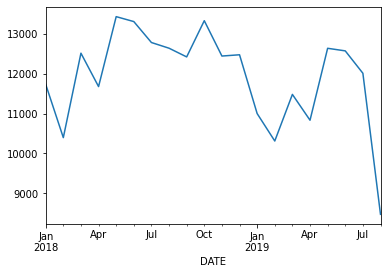

In [38]:
maccidents(df).plot()

In [43]:
df["HOUR"] = df["TIME"].astype(str)
df["HOUR"] = pd.to_datetime(df["HOUR"]).dt.hour

In [39]:
def haccidents(df):
    """
    Group accidents by hour of day
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `hourly_accidents`: The grouped Series

    """
    
    hourly_accidents = df.groupby("HOUR")["COLLISION_ID"].size()
    
    return hourly_accidents

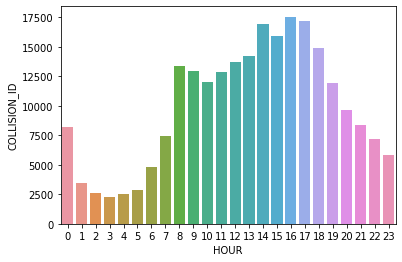

In [44]:
import seaborn as sns
sns.barplot(x= 'HOUR', y = "COLLISION_ID", data= haccidents(df).reset_index());

There are more accidents in peak hours 16 and 17 hours which is when people is leaving the office and returning home.

In [45]:
df['DAY']=(df['DATE']).dt.weekday

In [46]:
def day(df):
    """
    Group accidents by day of the week
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `weekday_accidents`: The grouped Series
    """
    
    weekday_accidents = df.groupby("DAY")["COLLISION_ID"].size()
    
    return weekday_accidents

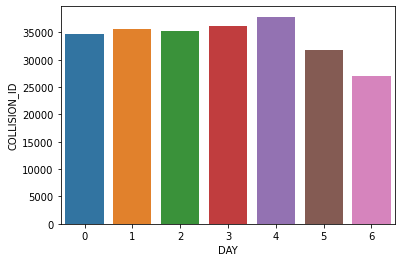

In [47]:
sns.barplot(x= 'DAY', y = "COLLISION_ID", data= day(df).reset_index());

Accidents appear to be more frequent during weekdays vs weekends.

In [49]:
def perborough(df):
    """
    Group accidents by borough
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `boroughs`: The grouped Series
    """
    
    boroughs = df.groupby("BOROUGH")["COLLISION_ID"].size()
    
    return boroughs

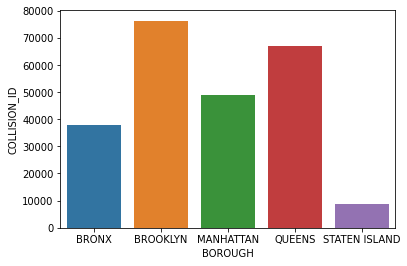

In [50]:
sns.barplot(x= 'BOROUGH', y = "COLLISION_ID", data= perborough(df).reset_index());

Accidents are more frequent in Brooklyn and Queens, Staten Island has the less amount of accidents.

# Task 3 webscrapping

In [51]:
# Libraries needed for basic web-scraping
from IPython.core.display import HTML
from bs4 import BeautifulSoup
from IPython.display import IFrame
import urllib # package required to interact with live webpage
import pandas as pd # will use to store the data from the webpage

In [52]:
# Scrape data from website
site_url='https://en.wikipedia.org/wiki/Boroughs_of_New_York_City'
r = urllib.request.urlopen(site_url)
site_content = r.read().decode('utf-8')

# Saving scraped HTML to .html file (for later processing)
with open('saved_page.html', 'w') as f:
    f.write(site_content)

# Use html.parser to create soup
s = BeautifulSoup(site_content, 'html.parser')

In [53]:
# Look at the soup object by using prettify() method
print(s.prettify()[:500]) # Only show portion of text as it is very long

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Boroughs of New York City - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"81c90662-
